In [2]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Goal
*get fast food data
```
new_fast_food_combined_data.csv
``` 
is in Analaysis/Data

* 

In [4]:
fast_food_10000_df = pd.read_csv('new_fast_food_combined_data.csv')
fast_food_10000_df.head()

,County,"Fast-food restaurants, 2011","Fast-food restaurants, 2016","Fast-food restaurants (% change), 2011-16","Fast-food restaurants/10,000 pop, 2011","Fast-food restaurants/10,000 pop, 2016","Fast-food restaurants/1,000 pop (% change), 2011-16"
0,Alameda,1090,1293,18.623853,7.11388,7.82102,9.940291
1,Alpine,2,0,-100.000000,18.29826,0.00000,-100.000000
2,Amador,12,21,75.000000,3.19668,5.60403,75.308222
3,Butte,147,158,7.482993,6.68173,6.97495,4.388394
4,Calaveras,26,30,15.384615,5.75692,6.62032,14.997581


In [5]:
fast_food_10000_df.columns

Index(['County', 'Fast-food restaurants, 2011', 'Fast-food restaurants, 2016',
       'Fast-food restaurants (% change), 2011-16',
       'Fast-food restaurants/10,000 pop, 2011',
       'Fast-food restaurants/10,000 pop, 2016',
       'Fast-food restaurants/1,000 pop (% change), 2011-16'],
      dtype='object')

In [8]:
del fast_food_10000_df['Fast-food restaurants, 2011']
del fast_food_10000_df['Fast-food restaurants, 2016']
del fast_food_10000_df['Fast-food restaurants (% change), 2011-16']

In [10]:
fast_food_10000_df.head()

,County,"Fast-food restaurants/10,000 pop, 2011","Fast-food restaurants/10,000 pop, 2016","Fast-food restaurants/1,000 pop (% change), 2011-16"
0,Alameda,7.11388,7.82102,9.940291
1,Alpine,18.29826,0.00000,-100.000000
2,Amador,3.19668,5.60403,75.308222
3,Butte,6.68173,6.97495,4.388394
4,Calaveras,5.75692,6.62032,14.997581


(array([42., 14.,  1.,  1.]),
 array([ 3.19668 ,  6.972075, 10.74747 , 14.522865, 18.29826 ]),
 <a list of 4 Patch objects>)

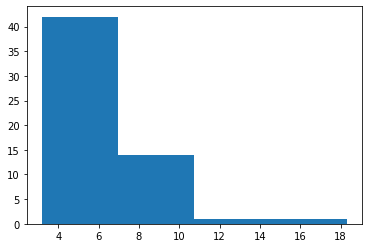

In [13]:
plt.hist(fast_food_10000_df['Fast-food restaurants/10,000 pop, 2011'], bins=4)

(array([ 5., 40., 12.,  1.]),
 array([ 0.     ,  3.72314,  7.44628, 11.16942, 14.89256]),
 <a list of 4 Patch objects>)

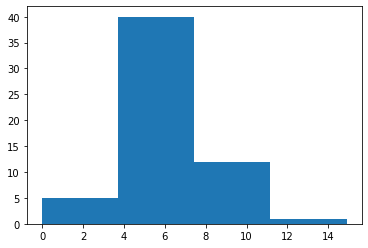

In [14]:
plt.hist(fast_food_10000_df['Fast-food restaurants/10,000 pop, 2016'], bins=4)

(array([ 1.,  6., 50.,  1.]),
 array([-100.       ,  -56.1729445,  -12.345889 ,   31.4811665,
          75.308222 ]),
 <a list of 4 Patch objects>)

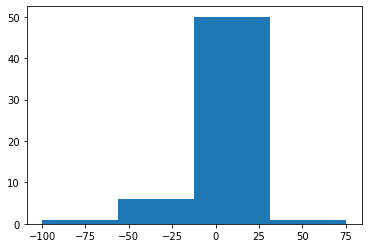

In [16]:
plt.hist(fast_food_10000_df['Fast-food restaurants/1,000 pop (% change), 2011-16'],bins=4)

In [17]:
#required to merge FIPS data so that the data can be made into a Choropleth
fips_df = pd.read_csv('fips.csv')
fips_df.head()

,County,CountyFIPS
0,Alameda,6001
1,Alpine,6003
2,Amador,6005
3,Butte,6007
4,Calaveras,6009


In [19]:
merged_fastfood_df = pd.merge(fips_df, fast_food_10000_df, how='outer', on='County')


58

In [22]:
merged_fastfood_df.columns

Index(['County', 'CountyFIPS', 'Fast-food restaurants/10,000 pop, 2011',
       'Fast-food restaurants/10,000 pop, 2016',
       'Fast-food restaurants/1,000 pop (% change), 2011-16'],
      dtype='object')

In [23]:
merged_fastfood_df["Fast-food restaurants/10,000 pop, 2011"] = merged_fastfood_df["Fast-food restaurants/10,000 pop, 2011"].map("{:.2f}".format)
merged_fastfood_df["Fast-food restaurants/10,000 pop, 2016"] = merged_fastfood_df["Fast-food restaurants/10,000 pop, 2016"].map("{:.2f}".format)
merged_fastfood_df["Fast-food restaurants/1,000 pop (% change), 2011-16"] = merged_fastfood_df["Fast-food restaurants/1,000 pop (% change), 2011-16"].map("{:.2f}".format)

In [25]:
merged_fastfood_df = merged_fastfood_df.astype({"Fast-food restaurants/10,000 pop, 2011": float, 
                                                  "Fast-food restaurants/10,000 pop, 2016": float,
                                                 "Fast-food restaurants/1,000 pop (% change), 2011-16": float})

In [26]:
merged_fastfood_df.to_csv("fast_food_per_10000.csv", encoding="utf-8", index=False, header=True)